# Visualing Spatial Data in Python: An very brief overview 

[**Michele Tizzoni** (@mtizzoni)](https://twitter.com/mtizzoni), <michele.tizzoni@isi.it>

[**Daniela Paolotti** (@danielapaolotti)](https://twitter.com/danielapaolotti), <daniela.paolotti@isi.it>

Most of the SDG indicators, along with development and humanitarian data, are georeferenced.

In this notebook we show how to deal with spatial data with Python with a specific focus on:
* loading and visualizing spatial data
* creating a map for a generic indicator at country level
* visualizing shapefiles

## Mapping in Python with geopandas

In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

import geopandas as gpd
import pysal as ps

import seaborn as sns
from seaborn import palplot
import numpy as np

import pandas as pd


## Loading up spatial data 

The easiest way to get from a file to a quick visualization of the data is by loading it as a `GeoDataFrame` and calling the `plot` command. The main library employed for all of this is `geopandas` which is a geospatial extension of the `pandas` library, already introduced before. `geopandas` supports exactly the same functionality that `pandas` does (in fact since it is built on top of it, so most of the underlying machinery is pure `pandas`), plus a wide range of spatial counterparts that make manipulation and general "munging" of spatial data as easy as non-spatial tables.

In two lines of code, we will obtain a graphical representation of the spatial data contained in a file that can be in many formats.

Let us begin with the most common type of spatial data in the social science: **polygons**. 

For example, we can load the geography of the world with two lines of code.

In [2]:
path = gpd.datasets.get_path('naturalearth_lowres')
df_world = gpd.read_file(path)

In [3]:
df_world

pop_est                continent                    name iso_a3  \
0     28400000.0                     Asia             Afghanistan    AFG   
1     12799293.0                   Africa                  Angola    AGO   
2      3639453.0                   Europe                 Albania    ALB   
3      4798491.0                     Asia    United Arab Emirates    ARE   
4     40913584.0            South America               Argentina    ARG   
5      2967004.0                     Asia                 Armenia    ARM   
6         3802.0               Antarctica              Antarctica    ATA   
7          140.0  Seven seas (open ocean)  Fr. S. Antarctic Lands    ATF   
8     21262641.0                  Oceania               Australia    AUS   
9      8210281.0                   Europe                 Austria    AUT   
10     8238672.0                     Asia              Azerbaijan    AZE   
11     8988091.0                   Africa                 Burundi    BDI   
12    10414336.0                   Europe                 Belgium    BEL   
13     8791832.0                   Africa                   Benin    BEN   
14    15746232.0                   Africa            Burkina Faso    BFA   
15   156050883.0                     Asia              Bangladesh    BGD   
16     7204687.0                   Europe                Bulgaria    BGR   
17      309156.0            North America                 Bahamas    BHS   
18     4613414.0                   Europe        Bosnia and Herz.    BIH   
19     9648533.0                   Europe                 Belarus    BLR   
20      307899.0            North America                  Belize    BLZ   
21     9775246.0            South America                 Bolivia    BOL   
22   198739269.0            South America                  Brazil    BRA   
23      388190.0                     Asia                  Brunei    BRN   
24      691141.0                     Asia                  Bhutan    BTN   
25     1990876.0                   Africa                Botswana    BWA   
26     4511488.0                   Africa    Central African Rep.    CAF   
27    33487208.0            North America                  Canada    CAN   
28     7604467.0                   Europe             Switzerland    CHE   
29    16601707.0            South America                   Chile    CHL   
..           ...                      ...                     ...    ...   
147    7379339.0                   Europe                  Serbia    SRB   
148     481267.0            South America                Suriname    SUR   
149    5463046.0                   Europe                Slovakia    SVK   
150    2005692.0                   Europe                Slovenia    SVN   
151    9059651.0                   Europe                  Sweden    SWE   
152    1123913.0                   Africa               Swaziland    SWZ   
153   20178485.0                     Asia                   Syria    SYR   
154   10329208.0                   Africa                    Chad    TCD   
155    6019877.0                   Africa                    Togo    TGO   
156   65905410.0                     Asia                Thailand    THA   
157    7349145.0                     Asia              Tajikistan    TJK   
158    4884887.0                     Asia            Turkmenistan    TKM   
159    1131612.0                     Asia             Timor-Leste    TLS   
160    1310000.0            North America     Trinidad and Tobago    TTO   
161   10486339.0                   Africa                 Tunisia    TUN   
162   76805524.0                     Asia                  Turkey    TUR   
163   22974347.0                     Asia                  Taiwan    TWN   
164   41048532.0                   Africa                Tanzania    TZA   
165   32369558.0                   Africa                  Uganda    UGA   
166   45700395.0                   Europe                 Ukraine    UKR   
167    3494382.0            South America                

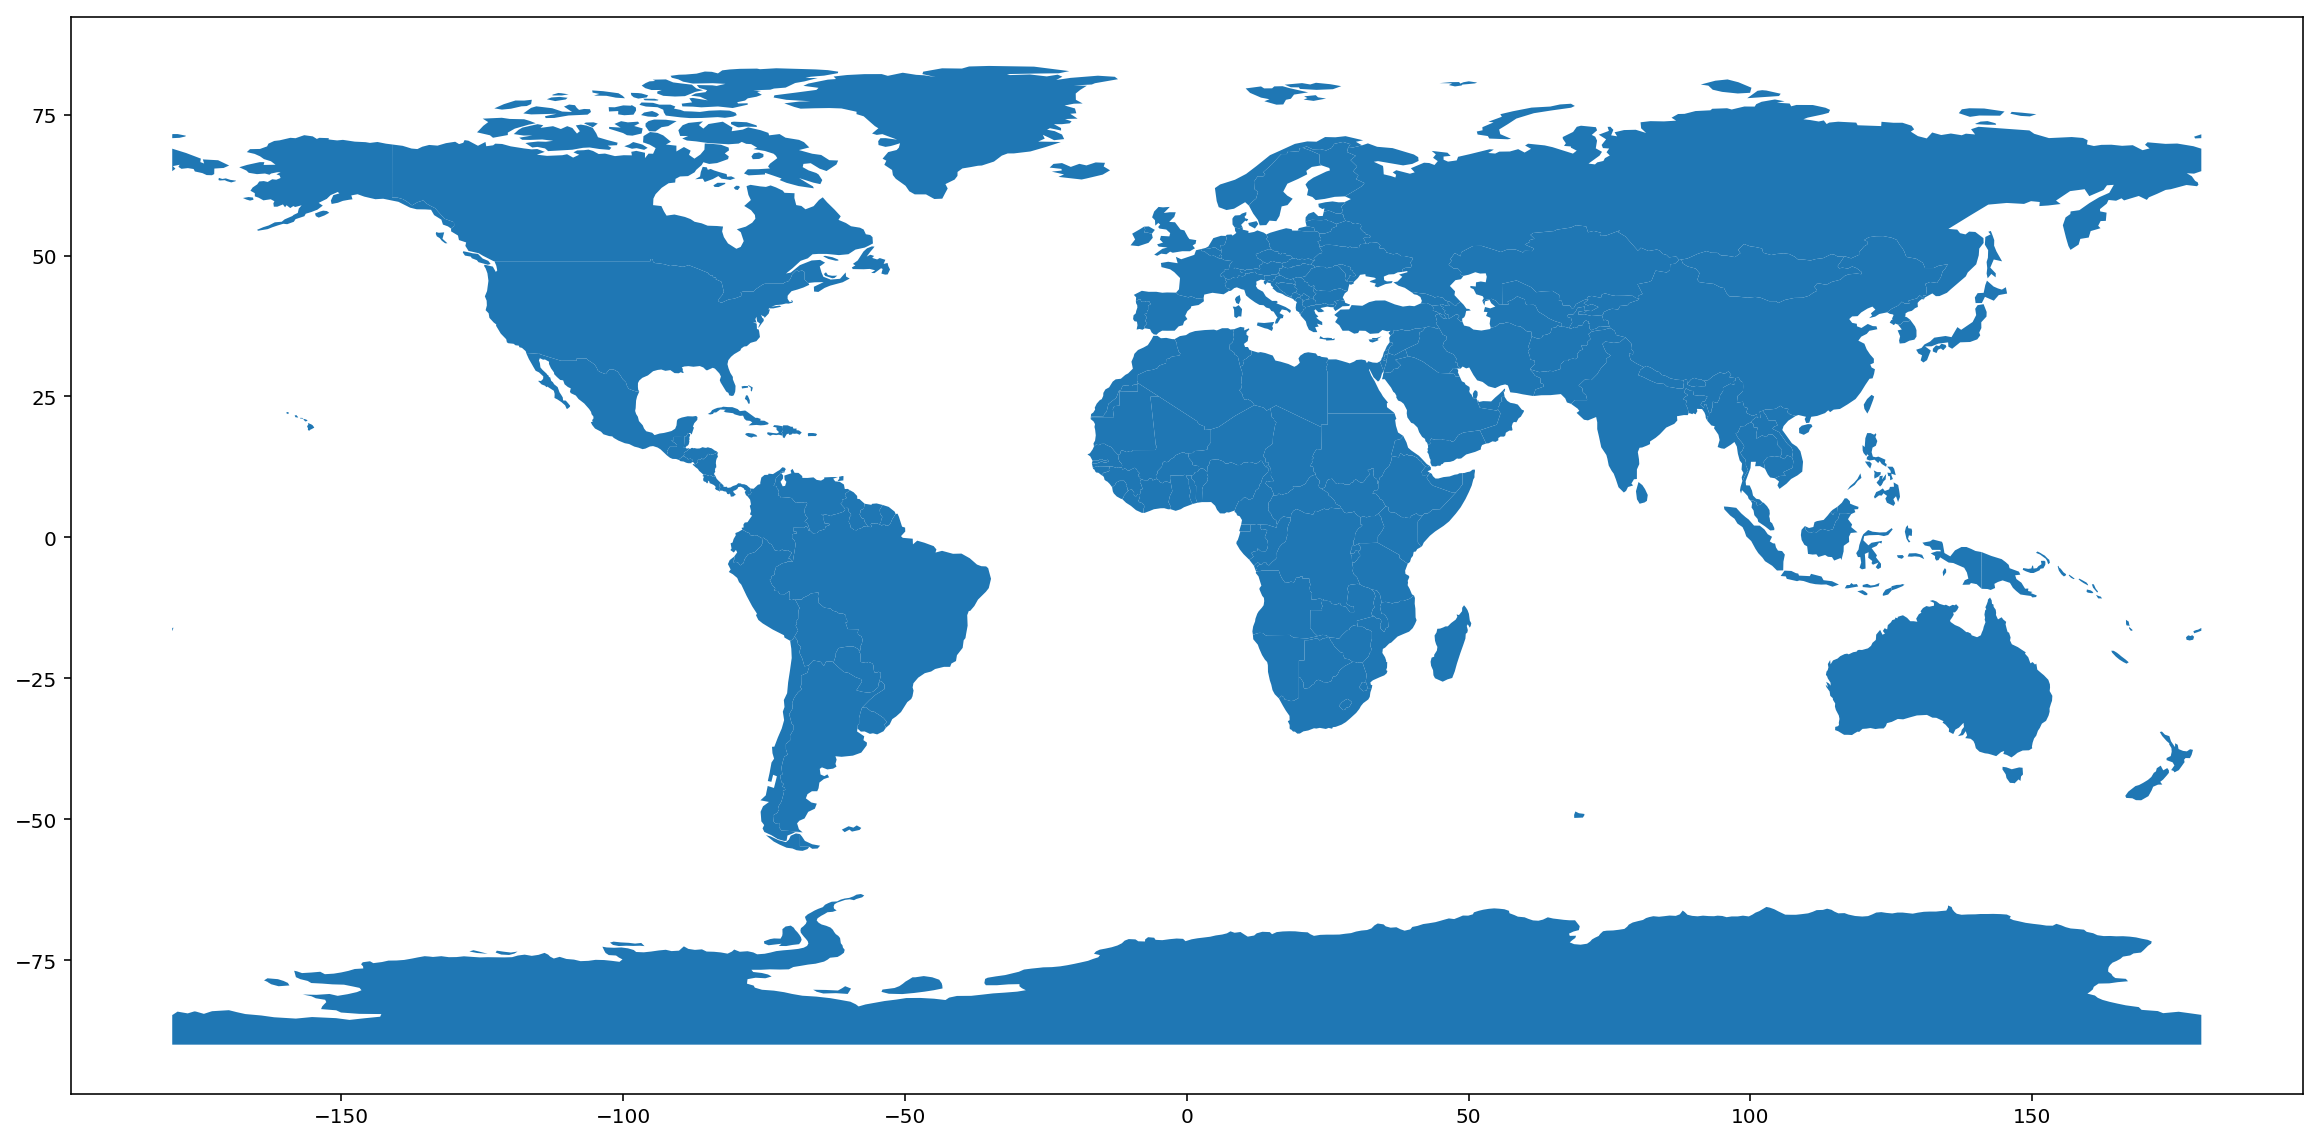

In [4]:
df_world.plot(figsize=(20,25))

If you call a single row of the `geometry` column, it'll return a small plot ith the shape:

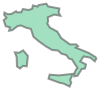

In [5]:
df_world.loc[79, 'geometry']

Other examples are available but of course this is not the end of the story.

In [6]:
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [7]:
citypath=gpd.datasets.get_path('naturalearth_cities')

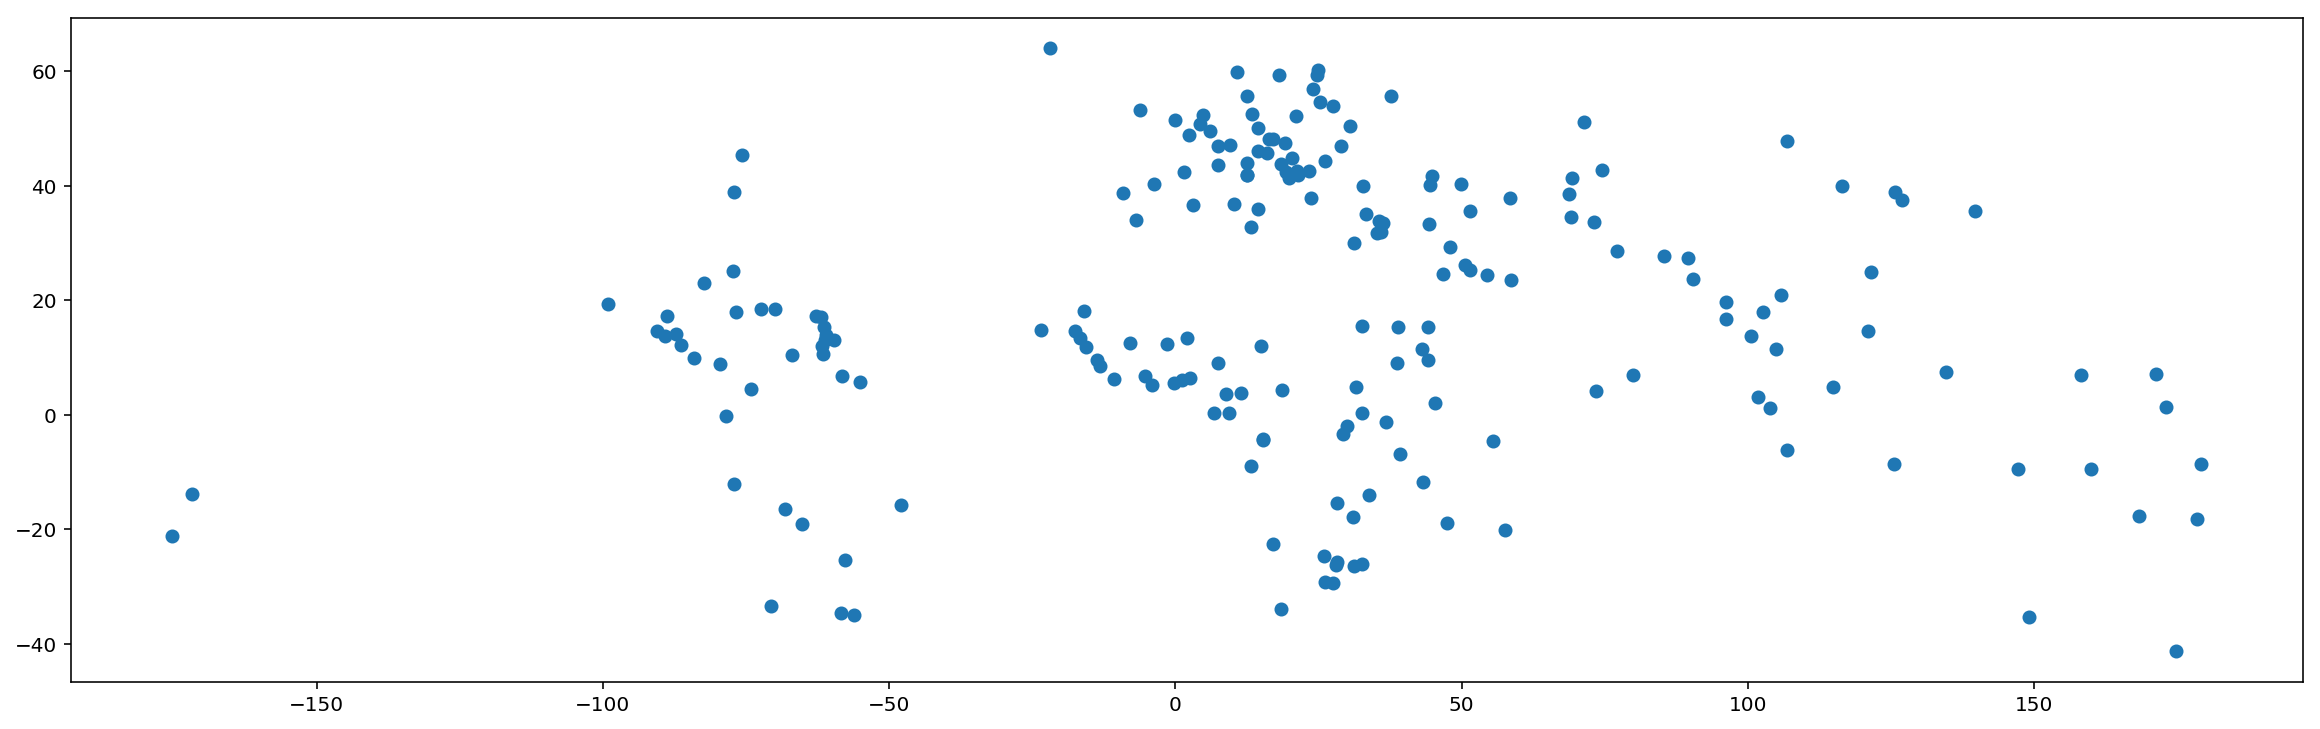

In [8]:
df_city = gpd.read_file(citypath)
df_city.plot(figsize=(20,25))

In [9]:
df_city

name                                       geometry
0        Vatican City    POINT (12.45338654497177 41.90328217996012)
1          San Marino      POINT (12.44177015780014 43.936095834768)
2               Vaduz    POINT (9.516669472907267 47.13372377429357)
3          Luxembourg    POINT (6.130002806227083 49.61166037912108)
4             Palikir    POINT (158.1499743237623 6.916643696007725)
5              Majuro    POINT (171.3800001757465 7.103004311216239)
6            Funafuti   POINT (179.2166470940289 -8.516651999041073)
7            Melekeok    POINT (134.6265484669922 7.487396172977981)
8              Monaco    POINT (7.406913173465057 43.73964568785249)
9              Tarawa    POINT (173.0175708285494 1.338187505624603)
10             Moroni   POINT (43.24024409869332 -11.70415769566847)
11            Andorra      POINT (1.51648596050552 42.5000014435459)
12      Port-of-Spain   POINT (-61.51703088544974 10.65199708957726)
13             Kigali    POINT (30.05858591906411 -1.95164421006325)
14            Mbabane   POINT (31.13333451205636 -26.31665077840921)
15               Juba    POINT (31.58002559278731 4.829975198277964)
16          Ljubljana     POINT (14.51496903347413 46.0552883087945)
17         Bratislava    POINT (17.11698075223461 48.15001832996171)
18               Doha     POINT (51.5329678942993 25.28655600890659)
19          Podgorica    POINT (19.26630692411823 42.46597251288171)
20               Bern    POINT (7.466975462482424 46.91668275866772)
21           Pristina    POINT (21.16598425159987 42.66670961411938)
22             Roseau   POINT (-61.38701298180337 15.30101564428332)
23           Djibouti    POINT (43.14800166705226 11.59501446425548)
24             Banjul    POINT (-16.5917014892126 13.45387646031594)
25             Skopje     POINT (21.4334614651425 42.00000612290586)
26         Bridgetown   POINT (-59.61652673505159 13.10200258275114)
27          Bujumbura    POINT (29.3600060615284 -3.376087220374643)
28          Kingstown   POINT (-61.21206242027932 13.14827882786841)
29           Castries   POINT (-61.00000818036955 14.00197348933034)
..                ...                                            ...
172         Amsterdam    POINT (4.914694317400972 52.35191454666443)
173             Seoul    POINT (126.9977851382019 37.56829495838895)
174            Manila    POINT (120.9802713035424 14.60610481344054)
175            Berlin    POINT (13.39960276470055 52.52376452225116)
176          Kinshasa   POINT (15.31302602317174 -4.327778243275986)
177         New Delhi    POINT (77.19998002005303 28.60002300924543)
178            Athens    POINT (23.73137522567936 37.98527209055226)
179           Baghdad    POINT (44.39192291456413 33.34059435615865)
180       Addis Ababa    POINT (38.69805857534868 9.035256221295754)
181            Tehran     POINT (51.42239817500899 35.6738886270013)
182      Buenos Aires  POINT (-58.39947723233144 -34.60055574990741)
183             Kabul    POINT (69.18131419070505 34.51863614490031)
184            Vienna    POINT (16.36469309674374 48.20196113681686)
185            Taipei      POINT (121.568333333333 25.0358333333333)
186  Washington, D.C.   POINT (-77.01136443943716 38.90149523508705)
187            London   POINT (-0.1186677024759319 51.5019405883275)
188            Riyadh    POINT (46.77079579868825 24.64277900781644)
189         Cape Town   POINT (18.43304229922603 -33.91806510862875)
190            Moscow     POINT (37.6135769672714 55.75410998124818)
191       Mexico City   POINT (-99.13293406029391 19.44438830141547)
192              Rome      POINT (12.481312562874 41.89790148509894)
193           Beijing    POINT (116.3863398256594 39.93083808990906)
194           Nairobi   POINT (36.81471100047145 -1.281400883237779)
195           Jakarta   POINT (106.8274917624701 -6.172471846798885)
196            Bogota   POINT (-74.08528981377441 4.598369421147822)
197             Cairo    POINT (31.24802236112612 30.05190620510371)
198            

# Mapping our dataset
We map the gender equality index we created in the first notebook

In [10]:
df_gender=pd.read_csv('./../data/Gender_ratio_SL_DOM_TSPDCW.csv', index_col=0)

In [11]:
df_gender

GeoAreaName  TimePeriod   Value_M  \
0                                             Albania      2011.0  0.347080   
1                                             Algeria      2012.0  0.833330   
2                                           Argentina      2013.0  3.894250   
3                                             Armenia      2008.0  0.582638   
4                                           Australia      2006.0  2.013750   
5                                             Austria      2009.0  1.224823   
6                                             Belarus      2015.0  0.694580   
7                                             Belgium      2013.0  0.859224   
8                                              Bhutan      2015.0  0.972080   
9                                              Brazil      2009.0  0.833330   
10                                           Bulgaria      2010.0  0.347080   
11                                           Cameroon      2014.0  0.902797   
12                                             Canada      2016.0  1.166668   
13                                              Chile      2015.0  2.482082   
14                                              China      2018.0  1.751573   
15     China, Hong Kong Special Administrative Region      2013.0  0.833330   
16                                           Colombia      2013.0  0.750000   
17                                         Costa Rica      2017.0  1.234463   
18                                            Denmark      2009.0  1.875000   
19                                 Dominican Republic      2016.0  1.645360   
20                                            Ecuador      2012.0  0.930840   
21                                              Egypt      2015.0  0.555420   
22                                        El Salvador      2010.0  0.908630   
23                                            Estonia      2010.0  0.763750   
24                                           Ethiopia      2013.0  0.555420   
25                                               Fiji      2016.0  1.622847   
26                                            Finland      2010.0  0.721429   
27                                             France      2010.0  1.084237   
28                                            Germany      2013.0  0.882500   
29                                              Ghana      2009.0  0.763750   
..                                                ...         ...       ...   
52                                        New Zealand      2010.0  1.319580   
53                                    North Macedonia      2015.0  0.451390   
54                                             Norway      2011.0  1.815299   
55                                               Oman      2008.0  5.000000   
56                                           Pakistan      2007.0  0.625000   
57                                             Panama      2011.0  1.117690   
58                                           Paraguay      2016.0  1.679167   
59                                               Peru      2010.0  1.632979   
60                                             Poland      2013.0  1.090474   
61                                           Portugal      2015.0  2.761875   
62                                              Qatar      2013.0  0.127290   
63                                  Republic of Korea      2014.0  0.783926   
64                                Republic of Moldova      2012.0  0.486786   
65                                            Romania      2012.0  0.509375   
66                                 Russian Federation      2014.0  1.527920   
67                                            Réunion      2010.0  0.972080   
68                                             Serbia      2015.0  1.394307   
69                                           Slovenia      2001.0  0.972080   
70                                       South Africa      2010.0  0.347080   
71           

In [12]:
df_gender=df_gender.rename(columns={'GeoAreaName':'name'})

In [13]:
pd.Series(list(set(df_gender.name).difference(set(df_world.name))))

0                                               Réunion
1        China, Hong Kong Special Administrative Region
2                                    Russian Federation
3                                    Dominican Republic
4                                   Republic of Moldova
5                                                 Malta
6     United Kingdom of Great Britain and Northern I...
7                      Lao People's Democratic Republic
8                                       North Macedonia
9                                     Republic of Korea
10                           Iran (Islamic Republic of)
11                                   State of Palestine
12                                            Mauritius
13                          United Republic of Tanzania
14                             United States of America
dtype: object

In [14]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(pd.Series(list(set(df_world.name).difference(set(df_gender.name)))))

0         Trinidad and Tobago
1                     Croatia
2               Côte d'Ivoire
3                      Uganda
4                 Solomon Is.
5                 Puerto Rico
6            Papua New Guinea
7                Sierra Leone
8                  Montenegro
9                        Chad
10                       Iran
11                       Cuba
12                    Moldova
13            Dem. Rep. Congo
14                     Kuwait
15               Turkmenistan
16                      Syria
17                  Venezuela
18                    Morocco
19                 Mozambique
20                 Azerbaijan
21                  N. Cyprus
22                    Burundi
23                     Brunei
24                    Lesotho
25                    Eritrea
26                  Macedonia
27                     Guinea
28                     Rwanda
29               Burkina Faso
30                       Togo
31                 Mauritania
32                       Mali
33        

In [15]:
df_gender['name'].replace({"Lao People's Democratic Republic":'Lao PDR',
                           "Iran (Islamic Republic of)":'Iran',
                           "Republic of Moldova":'Moldova',
                           "United Republic of Tanzania":'Tanzania',
                           "United States of America":'United States',
                           "North Macedonia":'Macedonia',
                           "Republic of Korea":'Korea',
                           "United Kingdom of Great Britain and Northern Ireland":'United Kingdom',
                           "Russian Federation":'Russia',
                           "State of Palestine":'Palestine'},inplace=True)

In [16]:
df_gender_world=df_world.merge(df_gender, on='name', how='inner')

In [17]:
df_gender_world

pop_est      continent            name iso_a3   gdp_md_est  \
0   3.639453e+06         Europe         Albania    ALB     21810.00   
1   4.091358e+07  South America       Argentina    ARG    573900.00   
2   2.967004e+06           Asia         Armenia    ARM     18770.00   
3   2.126264e+07        Oceania       Australia    AUS    800200.00   
4   8.210281e+06         Europe         Austria    AUT    329500.00   
5   1.041434e+07         Europe         Belgium    BEL    389300.00   
6   7.204687e+06         Europe        Bulgaria    BGR     93750.00   
7   9.648533e+06         Europe         Belarus    BLR    114100.00   
8   1.987393e+08  South America          Brazil    BRA   1993000.00   
9   6.911410e+05           Asia          Bhutan    BTN      3524.00   
10  3.348721e+07  North America          Canada    CAN   1300000.00   
11  7.604467e+06         Europe     Switzerland    CHE    316700.00   
12  1.660171e+07  South America           Chile    CHL    244500.00   
13  1.338613e+09           Asia           China    CHN   7973000.00   
14  1.887930e+07         Africa        Cameroon    CMR     42750.00   
15  4.564402e+07  South America        Colombia    COL    395400.00   
16  4.253877e+06  North America      Costa Rica    CRI     48320.00   
17  8.232976e+07         Europe         Germany    DEU   2918000.00   
18  5.500510e+06         Europe         Denmark    DNK    203600.00   
19  3.417819e+07         Africa         Algeria    DZA    232900.00   
20  1.457310e+07  South America         Ecuador    ECU    107700.00   
21  8.308287e+07         Africa           Egypt    EGY    443700.00   
22  4.052500e+07         Europe           Spain    ESP   1403000.00   
23  1.299371e+06         Europe         Estonia    EST     27410.00   
24  8.523734e+07         Africa        Ethiopia    ETH     68770.00   
25  5.250275e+06         Europe         Finland    FIN    193500.00   
26  9.447200e+05        Oceania            Fiji    FJI      3579.00   
27  6.405779e+07         Europe          France    FRA   2128000.00   
28  6.226200e+07         Europe  United Kingdom    GBR   1977704.00   
29  2.383250e+07         Africa           Ghana    GHA     34200.00   
..           ...            ...             ...    ...          ...   
47  4.320748e+06         Europe         Moldova    MDA     10670.00   
48  1.112118e+08  North America          Mexico    MEX   1563000.00   
49  2.066718e+06         Europe       Macedonia    MKD     18780.00   
50  3.041142e+06           Asia        Mongolia    MNG      9476.00   
51  2.571582e+07           Asia        Malaysia    MYS    384300.00   
52  1.671600e+07         Europe     Netherlands    NLD    672000.00   
53  4.676305e+06         Europe          Norway    NOR    276400.00   
54  4.213418e+06        Oceania     New Zealand    NZL    116700.00   
55  3.418085e+06           Asia            Oman    OMN     66980.00   
56  1.762429e+08           Asia        Pakistan    PAK    427300.00   
57  3.360474e+06  North America          Panama    PAN     38830.00   
58  2.954696e+07  South America            Peru    PER    247300.00   
59  3.848292e+07         Europe          Poland    POL    667900.00   
60  1.070792e+07         Europe        Portugal    PRT    208627.00   
61  6.995655e+06  South America        Paraguay    PRY     28890.00   
62  4.119083e+06           Asia       Palestine    PSE     11950.77   
63  8.332850e+05           Asia           Qatar    QAT     91330.00   
64  2.221542e+07         Europe         Romania    ROU    271400.00   
65  1.400412e+08         Europe          Russia    RUS   2266000.00   
66  7.185218e+06  North America     El Salvador    SLV     43630.00   
67  7.379339e+06         Europe          Serbia    SRB     80340.00   
68  2.005692e+06         Europe        Slovenia    SVN     59340.00   
69  9.059651e+06         Europe          Sweden    SWE    344300.00   
70  6.590541e+07           Asia        Thailand    THA    547400.00   
71  1.048634e+07         Africa  

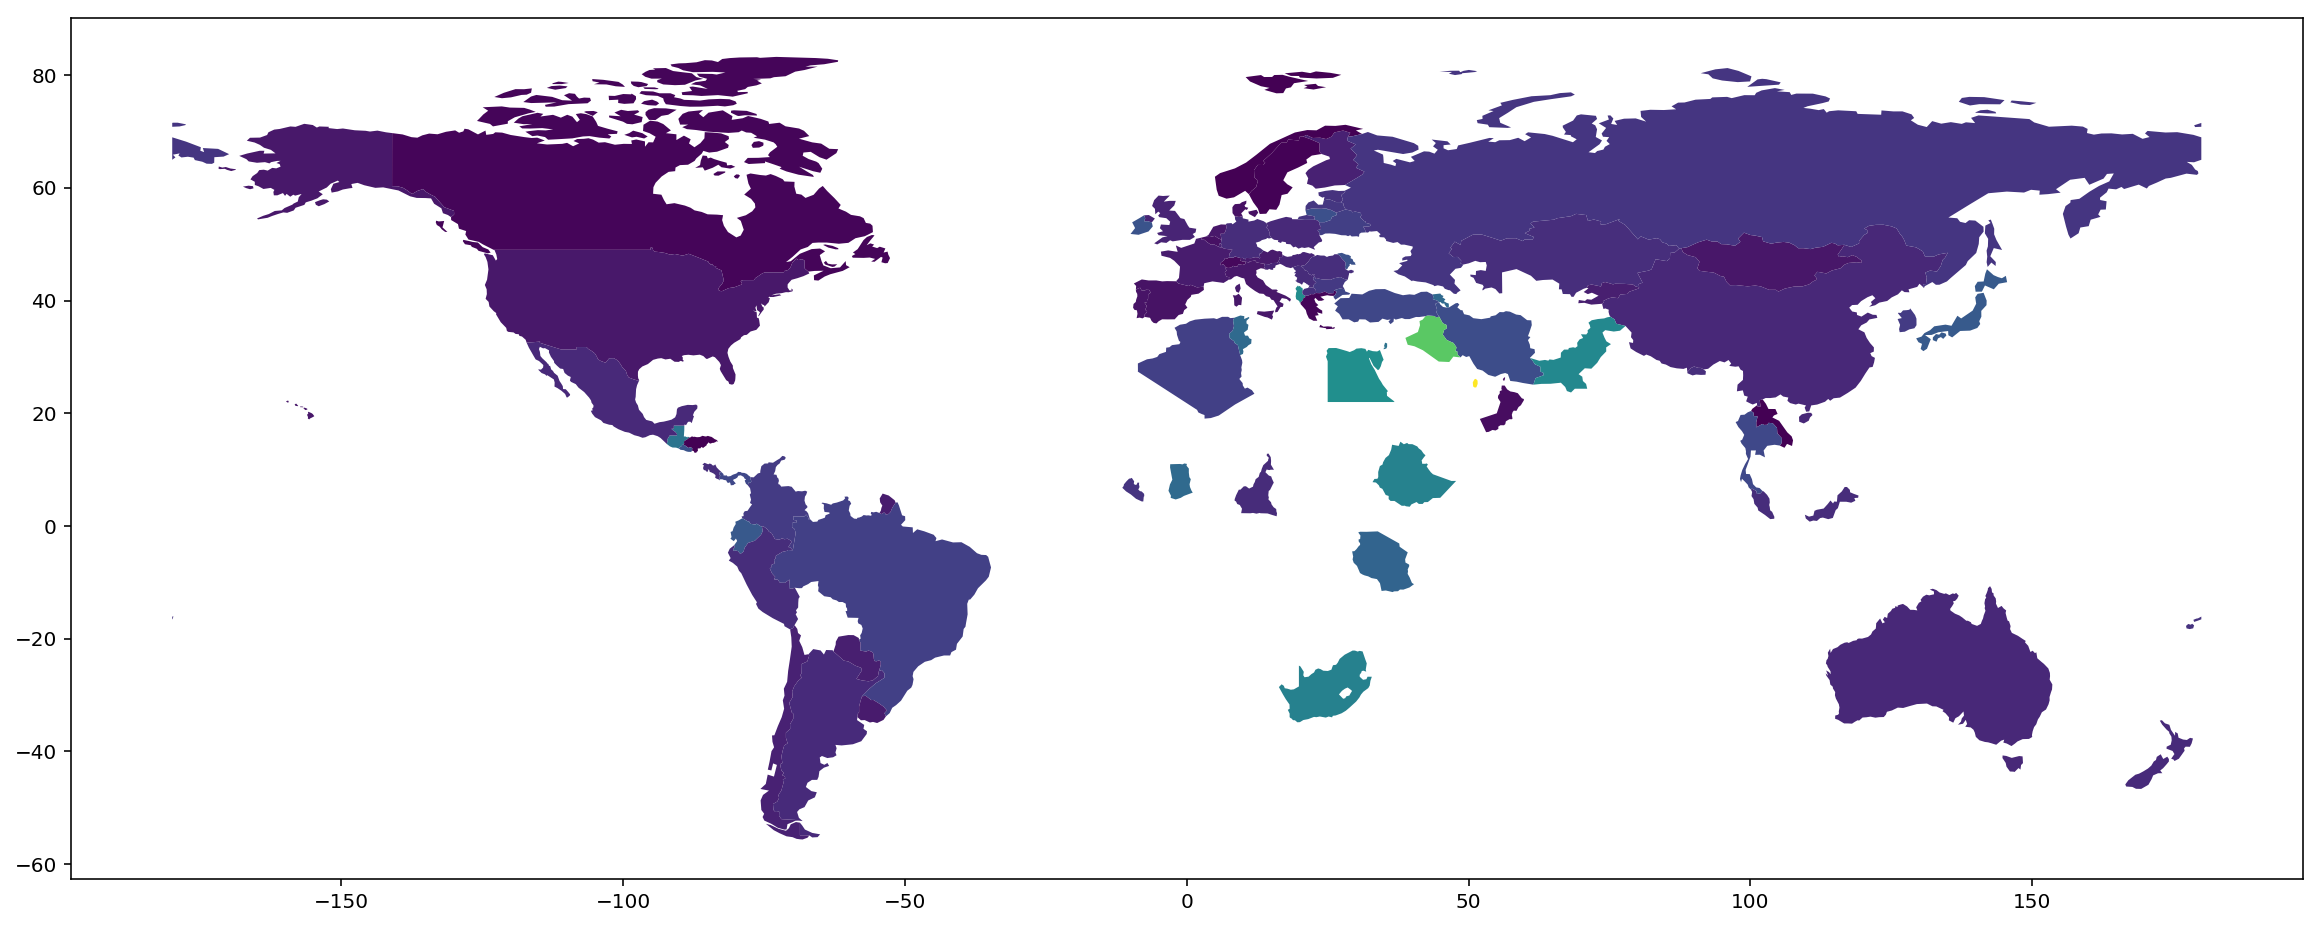

In [18]:
df_gender_world.plot(
    figsize=(20,25),
    column='Gender_ratio',
    cmap=plt.cm.viridis,     
)

It looks nice but we can add more details.

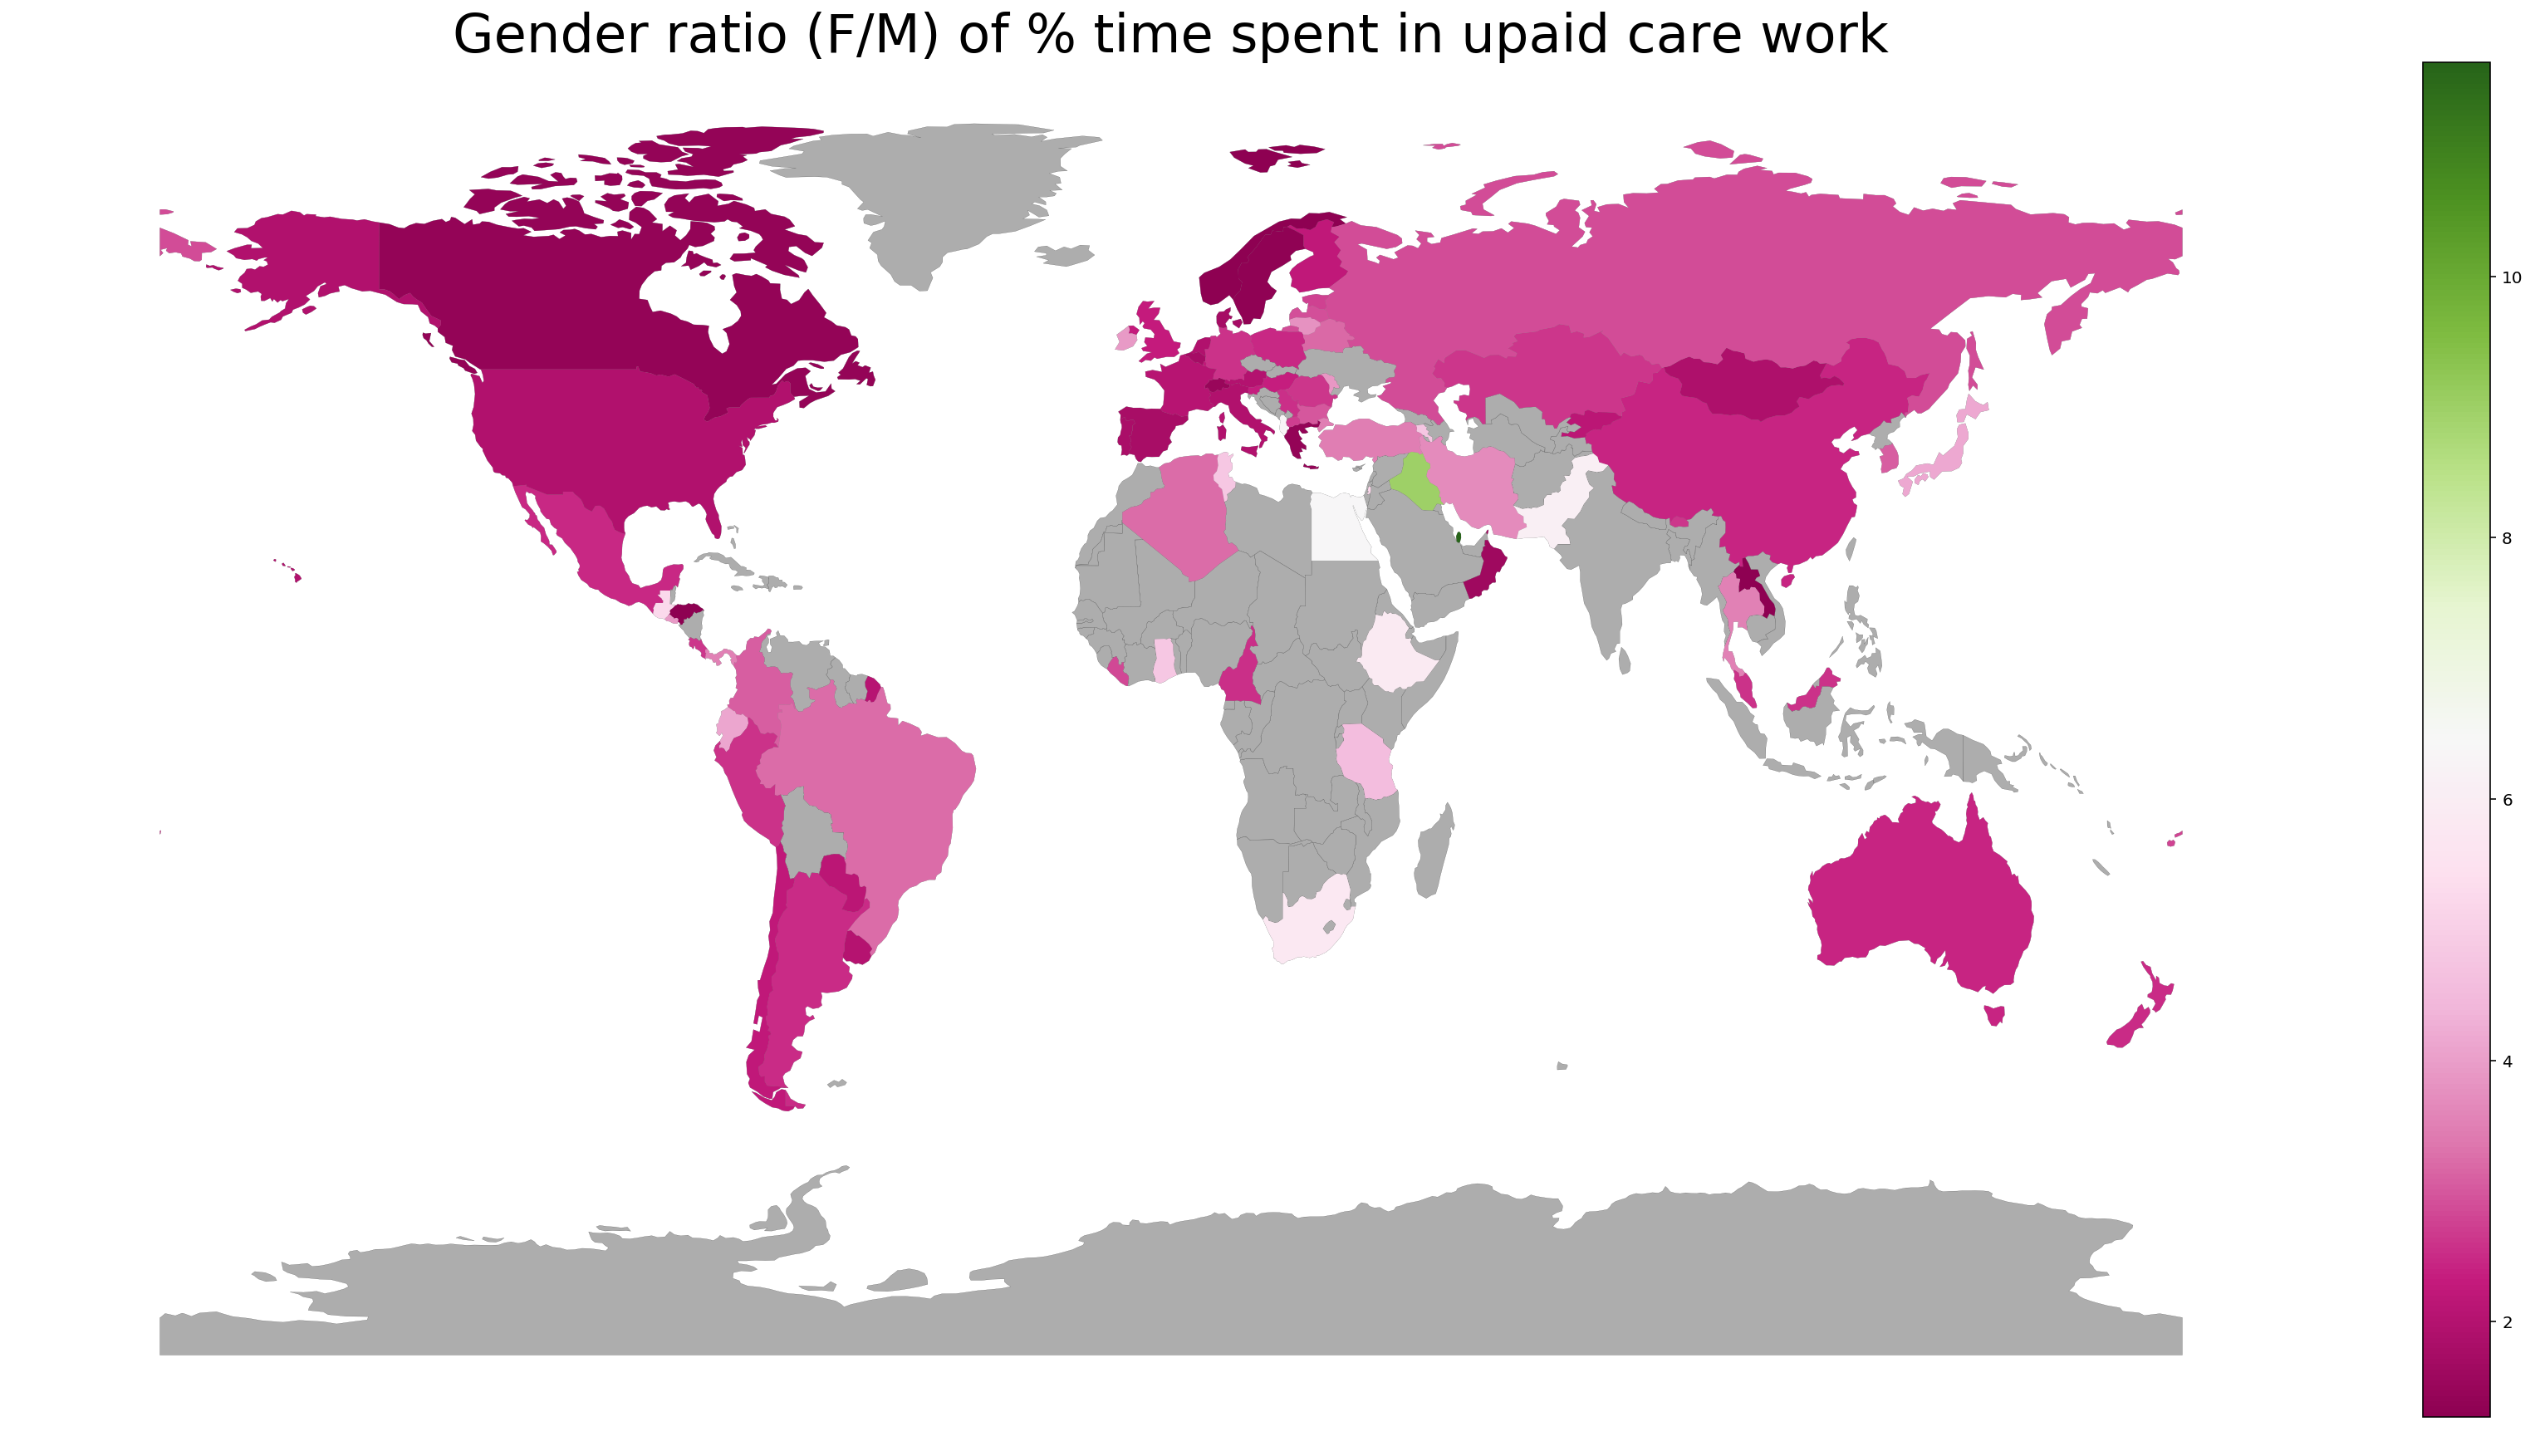

In [20]:
f, ax = plt.subplots(
    subplot_kw=dict(aspect='auto'))

f.set_figheight(15)
f.set_figwidth(30)

plt.title('Gender ratio (F/M) of % time spent in upaid care work', fontsize=32)

plt.axis('off')

df_world.plot(
    ax=ax,
    linewidth=0.1, 
    facecolor='#999999', 
    edgecolor='#111111', 
    alpha=0.8
)

df_gender_world.plot(
    ax=ax,
    column='Gender_ratio',
    cmap=plt.cm.PiYG,    
    legend=True,
)



# Working with shapefiles

It is possible to tweak several aspects of a plot to customize if to particular needs. In this section, we will explore some of the basic elements that will allow us to obtain more compelling maps.

* Remove axis
* Set title
* Customizing colors, lines, alpha
* Customizing size

These are styling options. Omit them or alter them to suit.

In [23]:
df_example=gpd.read_file('./../spatial/NK_IT_AOIEbola_StructuresAiresSante/NK_IT_AOIEbola_StructuresSanitaire_V12.shp')

In [24]:
df_example

PAYS   PROVINCE      NOMZS  CODEZS          NOMAS     CODEAS  \
0     RDC  NORD-KIVU  ALIMBONGO  612302      ALIMBANGO   61230201   
1     RDC  NORD-KIVU  ALIMBONGO  612302          BINGI   61230202   
2     RDC  NORD-KIVU  ALIMBONGO  612302     BUNYATENGE   61230203   
3     RDC  NORD-KIVU  ALIMBONGO  612302      BWATSINGE   61230202   
4     RDC  NORD KIVU  ALIMBONGO  612302  CHECK BUYINGA   61230100   
5     RDC  NORD-KIVU  ALIMBONGO  612302  CHECK BUYINGA   61230100   
6     RDC  NORD-KIVU  ALIMBONGO  612302  CHECK BUYINGA   61230100   
7     RDC  NORD-KIVU  ALIMBONGO  612302  CHECK BUYINGA   61230100   
8     RDC  NORD-KIVU  ALIMBONGO  612302  CHECK BUYINGA   61230100   
9     RDC  NORD-KIVU  ALIMBONGO  612302  CHECK BUYINGA   61230100   
10    RDC  NORD-KIVU  ALIMBONGO  612302  CHECK BUYINGA   61230100   
11    RDC  NORD-KIVU  ALIMBONGO  612302        KALIMBA   61230207   
12    RDC  NORD-KIVU  ALIMBONGO  612302        KALIMBA   61230207   
13    RDC  NORD-KIVU  ALIMBONGO  612302        KASEGHE  612302000   
14    RDC  NORD-KIVU  ALIMBONGO  612302        KASEGHE  612302000   
15    RDC  NORD-KIVU  ALIMBONGO  612302     KITSOMBIRO   61230212   
16    RDC  NORD-KIVU  ALIMBONGO  612302     KITSOMBIRO   61230212   
17    RDC  NORD KIVU  ALIMBONGO  612302        LUBANGO   61230213   
18    RDC  NORD-KIVU  ALIMBONGO  612302        NDOLUMA   61230218   
19    RDC  NORD-KIVU      BAMBO  612502         BUTARE   61250201   
20    RDC  NORD-KIVU      BAMBO  612502         BUTARE   61250201   
21    RDC  NORD-KIVU      BAMBO  612502     CBCE BAMBO   61250203   
22    RDC  NORD-KIVU      BAMBO  612502     CBCE BAMBO   61250203   
23    RDC  NORD-KIVU      BAMBO  612502     CBCE BAMBO   61250203   
24    RDC  NORD-KIVU      BAMBO  612502         KABIZO   61250205   
25    RDC  NORD-KIVU      BAMBO  612502         KAMENA   61250206   
26    RDC  NORD-KIVU      BAMBO  612502       KIBIRIZI  612502000   
27    RDC  NORD-KIVU      BAMBO  612502  KIRUMBA BAMBO   61250207   
28    RDC  NORD-KIVU      BAMBO  612502  KIRUMBA BAMBO   61250207   
29    RDC  NORD-KIVU      BAMBO  612502       KISHISHE   61250208   
...   ...        ...        ...     ...            ...        ...   
2579  RDC   SUD-KIVU     MWENGA  622401         IGANDA   62240104   
2580  RDC   SUD-KIVU     MWENGA  622401         IGANDA   62240104   
2581  RDC   SUD-KIVU     MWENGA  622401         KALOLE   62240107   
2582  RDC   SUD-KIVU     MWENGA  622401         KALOLE   62240107   
2583  RDC   SUD-KIVU     MWENGA  622401         KALOLE   62240107   
2584  RDC   SUD-KIVU     MWENGA  622401         KALOLE   62240107   
2585  RDC   SUD-KIVU     MWENGA  622401         KALOLE   62240107   
2586  RDC   SUD-KIVU     MWENGA  622401         KALOLE   62240107   
2587  RDC   SUD-KIVU     MWENGA  622401        KITAMBA   62240113   
2588  RDC   SUD-KIVU     MWENGA  622401        TUSESWA   62240118   
2589  RDC   SUD-KIVU     MWENGA  622401        TUSESWA   62240118   
2590  RDC   SUD-KIVU     MWENGA  622401        TUSESWA   62240118   
2591  RDC   SUD-KIVU     MWENGA  622401        TUSESWA   62240118   
2592  RDC   SUD-KIVU     MWENGA  622401        TUSESWA   62240118   
2593  RDC   SUD-KIVU     MWENGA  622401        TUSESWA   62240118   
2594  RDC   SUD-KIVU     MWENGA  622401        TUSESWA   62240118   
2595  RDC   SUD-KIVU     MWENGA  622401        TUSESWA   62240118   
2596  RDC   SUD-KIVU     MWENGA  622401       KITAGANA   62240112   
2597  RDC   SUD-KIVU     MWENGA  622401       KITAGANA   62240112   
2598  RDC   SUD-KIVU     MWENGA  622401       KITAGANA   62240112   
2599  RDC   SUD-KIVU     MWENGA  622401        BISEMBE   62240101   
2600  RDC   SUD-KIVU     MWENGA  622401        BISEMBE   62240101   
2601  RDC   SUD-KIVU     MWENGA  622401        BISEMBE   62240101   
2602  RDC   SUD-KIVU     MWENGA  622401        KIBANDA   62240109   
2603  RDC   SUD-KIVU   KAMITUGA  622403      MULAMBULA   62240316   
2604  RDC   SUD-KIVU     MWENGA  622401        MBOBOLE   62240114   
260

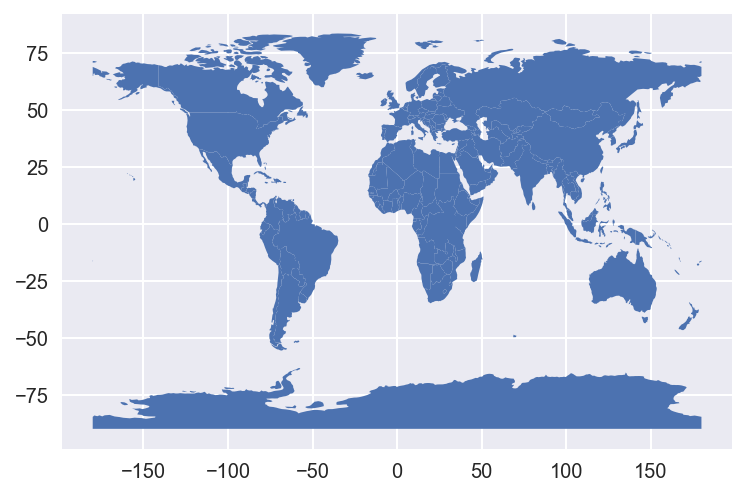

In [143]:
f, ax1 = plt.subplots(
    subplot_kw=dict(aspect='auto'))

df_example.plot(ax=ax1)
df_world.plot(ax=ax1)


In [21]:
import contextily as ctx

def add_basemap(ax, zoom, url='http://tile.stamen.com/terrain/tileZ/tileX/tileY.png'):
    xmin, xmax, ymin, ymax = ax.axis()
    basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
    ax.imshow(basemap, extent=extent, interpolation='bilinear')
    # restore original x/y limits
    ax.axis((xmin, xmax, ymin, ymax))

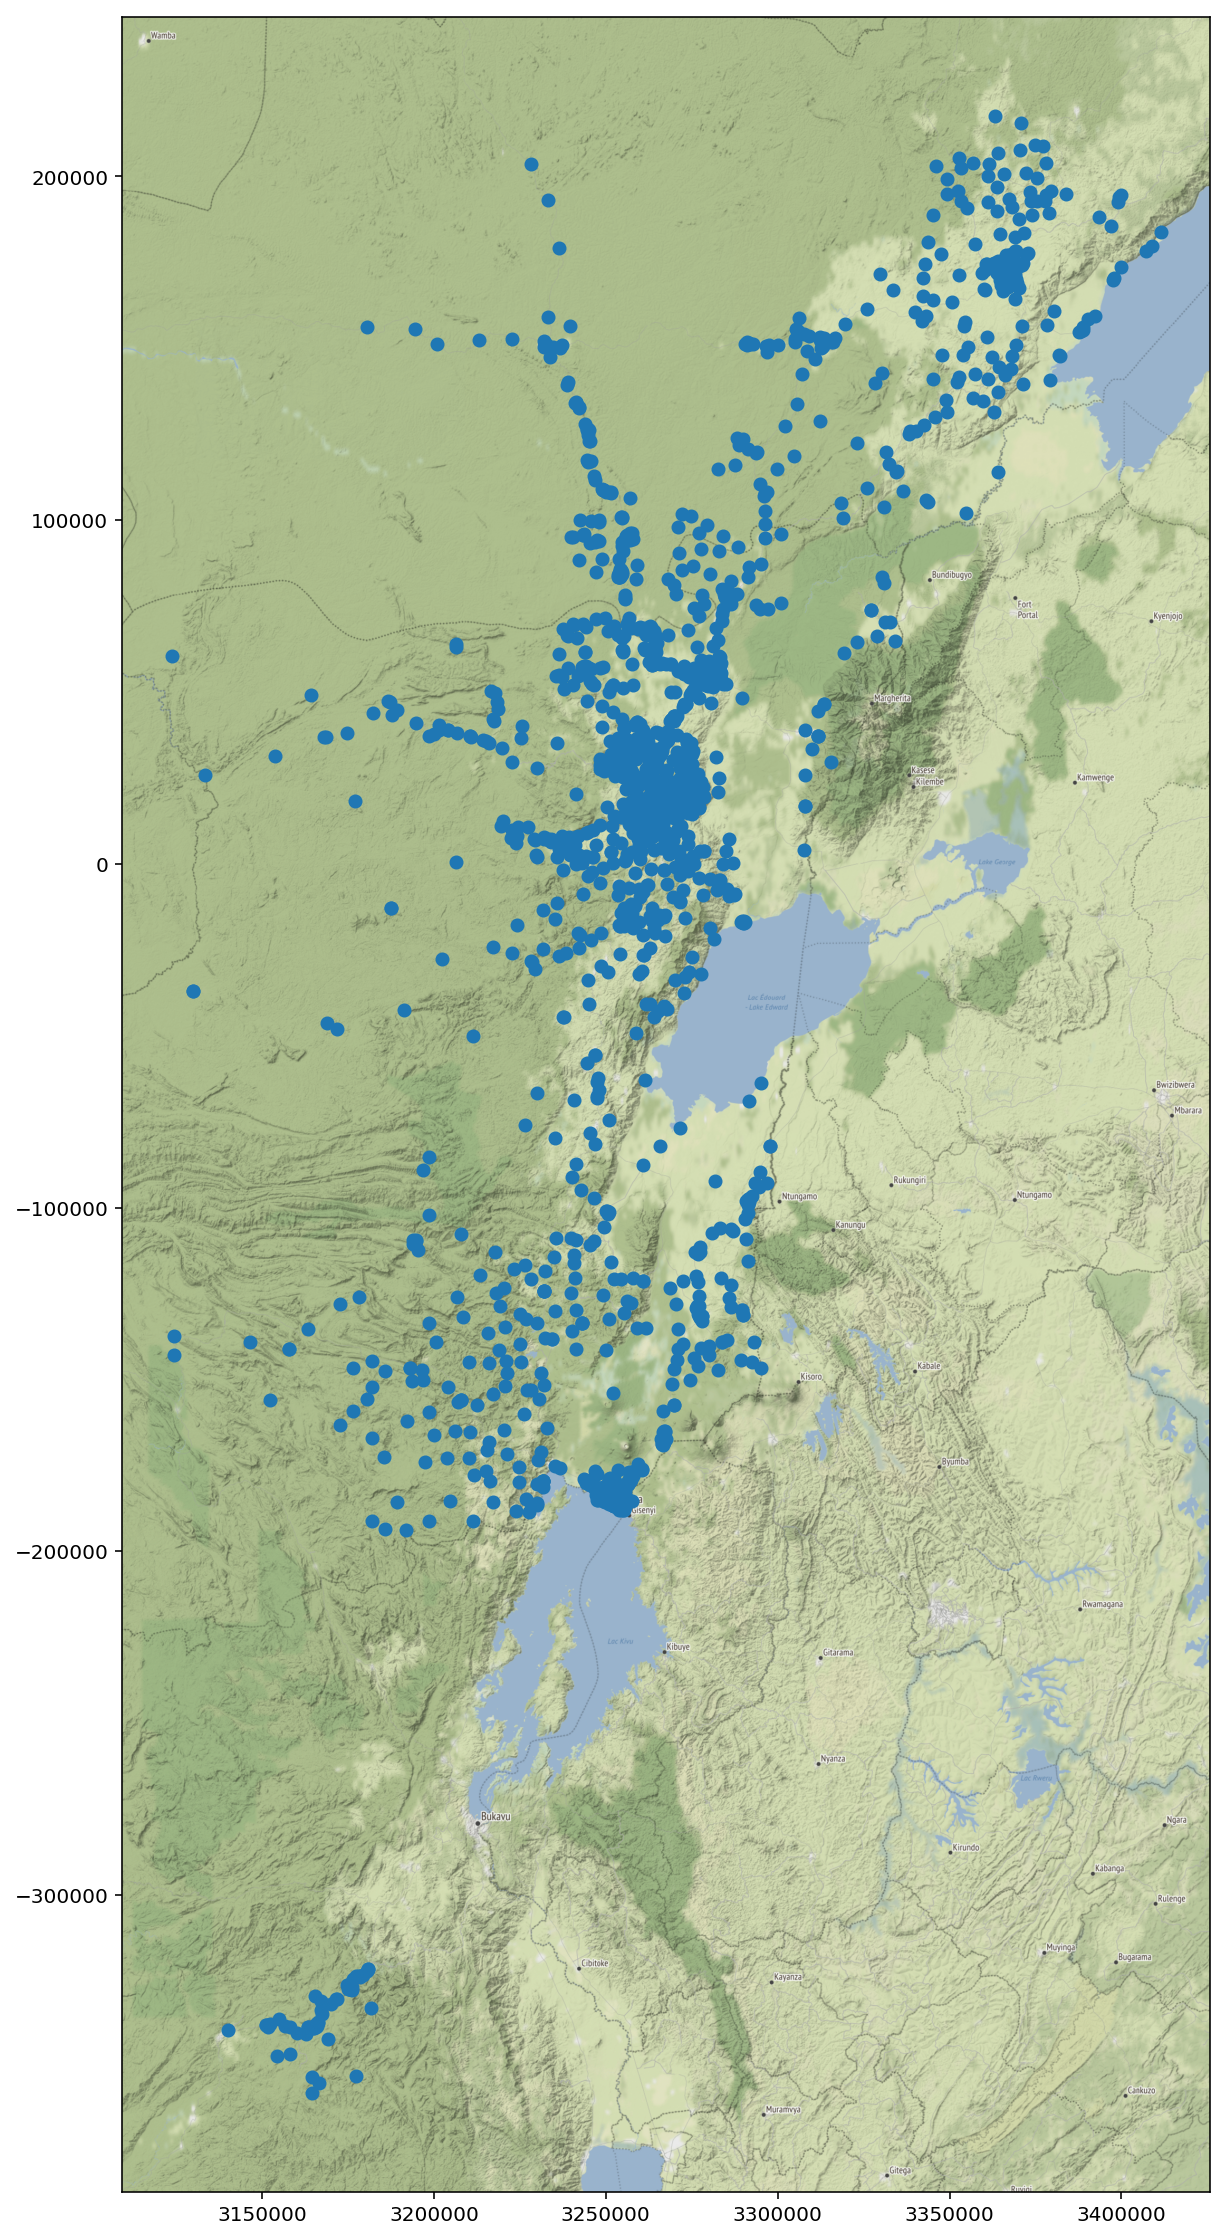

In [38]:
df_example = df_example.to_crs(epsg=3857)


ax1=df_example.plot(figsize=(10,20))
add_basemap(ax1, zoom=10)